# House Price Prediction Regression

# Project Goal

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
train_data_path = r"F:\College\ML\projects\house_price_prediction_dataset\train.csv"  #path is saved as raw string
test_data_path = r"F:\College\ML\projects\house_price_prediction_dataset\test.csv"
df_train = pd.read_csv(train_data_path)  # making a data frame of the training set and test set
df_test = pd.read_csv(test_data_path)

print("shape of df_train: ", df_train.shape)
print("shape of df_test: ", df_test.shape) 

shape of df_train:  (1460, 81)
shape of df_test:  (1458, 80)


In [3]:
#to see all the columns
pd.set_option("display.max_columns", None)

In [4]:
 df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Know your data

## Data Integration

In [6]:
df = pd.concat([df_train,df_test])  # concatinating the training set and test set

print("Shape of Integrated data / df : ", df.shape)

Shape of Integrated data / df :  (2918, 81)


In [7]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1453,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,546,546,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1454,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252,Unf,0,294,546,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1455,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224,Unf,0,0,1224,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1456,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337,Unf,0,575,912,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1457,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758,Unf,0,238,996,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Get Breif information of dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2918 entries, 0 to 1457
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2918 non-null   int64  
 1   MSSubClass     2918 non-null   int64  
 2   MSZoning       2914 non-null   object 
 3   LotFrontage    2432 non-null   float64
 4   LotArea        2918 non-null   int64  
 5   Street         2918 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2918 non-null   object 
 8   LandContour    2918 non-null   object 
 9   Utilities      2916 non-null   object 
 10  LotConfig      2918 non-null   object 
 11  LandSlope      2918 non-null   object 
 12  Neighborhood   2918 non-null   object 
 13  Condition1     2918 non-null   object 
 14  Condition2     2918 non-null   object 
 15  BldgType       2918 non-null   object 
 16  HouseStyle     2918 non-null   object 
 17  OverallQual    2918 non-null   int64  
 18  OverallCond  

In [10]:
int_features = df.select_dtypes(include=["int64"]).columns
print("Total Number of integer features : ", int_features.shape[0])

print("Integer Feature names: ", int_features.tolist())

Total Number of integer features :  30
Integer Feature names:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [11]:
float_features = df.select_dtypes(include=["float64"]).columns
print("Total Number of float features : ", float_features.shape[0])

print("float Feature names: ", float_features.tolist())

Total Number of float features :  8
float Feature names:  ['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [12]:
object_features = df.select_dtypes(include=["object"]).columns
print("Total Number of object features : ", object_features.shape[0])

print("Object Feature names: ", object_features.tolist())

Total Number of object features :  43
Object Feature names:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Get the Statistical Info of Numerical features

In [13]:
df.describe() #describing the data, it will help further to fill missing values in the dataset

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2918.000000,2918.000000,2432.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2895.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2759.000000,2917.000000,2917.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,1460.000000
mean,1459.773475,57.150446,69.293586,10169.563057,6.089788,5.564085,1971.321453,1984.276217,102.236615,441.423235,49.582248,560.772104,1051.777587,1159.672036,336.599040,4.696025,1500.967101,0.429894,0.061364,1.568197,0.380398,2.860521,1.044551,6.452365,0.597327,1978.125045,1.766884,472.940692,93.741947,47.503084,23.106237,2.603153,16.067855,2.252570,50.843386,6.213845,2007.792666,180921.195890
std,842.842610,42.519354,23.341934,7887.959547,1.409658,1.113004,30.293007,20.888290,179.355169,455.610826,169.205611,439.543659,440.766258,392.398970,428.729653,46.404695,506.013862,0.524736,0.245687,0.552964,0.502908,0.822680,0.214497,1.568991,0.646145,25.571608,0.761623,215.402124,126.536376,67.581354,64.253833,25.192440,56.193208,35.670034,567.498680,2.714918,1.315184,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.250000,20.000000,59.000000,7482.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1459.500000,50.000000,68.000000,9455.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.500000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.750000,70.000000,80.000000,11573.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.750000,704.000000,0.000000,1743.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [14]:
df.describe().shape

(8, 38)

## Handling Missing Value

## Visualize Null/Missing Value

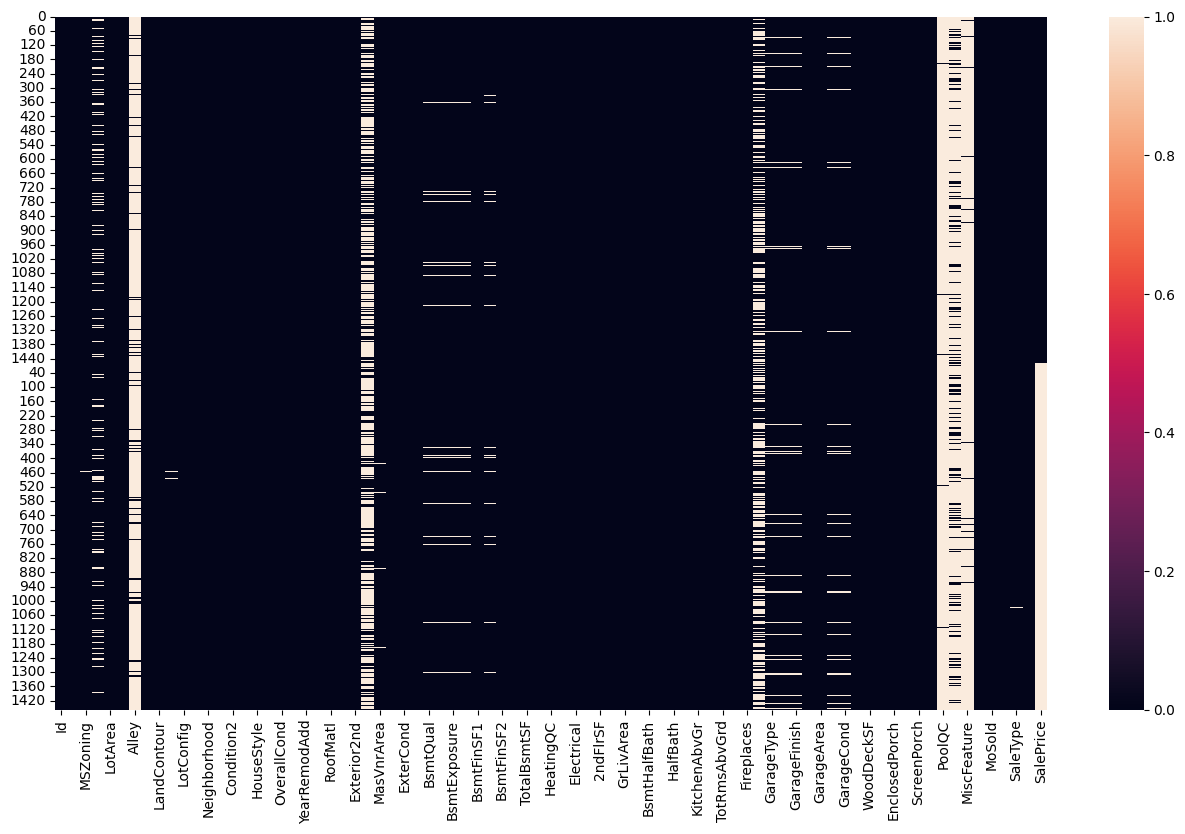

In [15]:
plt.figure(figsize=(16,9))  # using matplotlib and seaborn to genrate a heatmap.
sns.heatmap(df.isnull())
plt.savefig("EDA_image/heatmap_df_of_null_values.png")

## Get the null value percentage of every feature

In [16]:
df = df.set_index("Id")   ## ID IS NOT A FEATURE THAT IS WHY WE ARE SETTING IT AS INDEX

In [17]:
null_count = df.isnull().sum()  #checking how many null cells are there in each column
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1458
Length: 80, dtype: int64

In [18]:
null_percent = df.isnull().sum()/df.shape[0] * 100  #hence calculating the null percentage
null_percent

MSSubClass        0.000000
MSZoning          0.137080
LotFrontage      16.655243
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034270
SaleCondition     0.000000
SalePrice        49.965730
Length: 80, dtype: float64

### Drop Columns

In [19]:
miss_value_50_perc = null_percent[null_percent > 50]
print(miss_value_50_perc)

Alley          93.214531
MasVnrType     60.486635
PoolQC         99.657300
Fence          80.466073
MiscFeature    96.401645
dtype: float64


In [20]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [21]:
miss_value_20_perc = null_percent[(null_percent > 20) & (null_percent < 50)]
print(miss_value_20_perc)

FireplaceQu    48.629198
SalePrice      49.965730
dtype: float64


In [22]:
miss_value_5_perc = null_percent[(null_percent > 5) & (null_percent < 20)]
print(miss_value_5_perc)

LotFrontage     16.655243
GarageType       5.380398
GarageYrBlt      5.448938
GarageFinish     5.448938
GarageQual       5.448938
GarageCond       5.448938
dtype: float64


<Axes: ylabel='Id'>

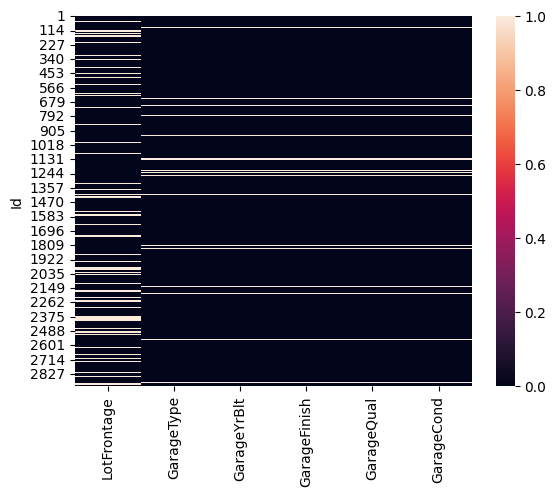

In [23]:
sns.heatmap(df[miss_value_5_perc.keys()].isnull())

### Missing Value Imputation

In [24]:
missing_value_feat = null_percent[null_percent > 0]
missing_value_feat

MSZoning         0.137080
LotFrontage     16.655243
Alley           93.214531
Utilities        0.068540
Exterior1st      0.034270
Exterior2nd      0.034270
MasVnrType      60.486635
MasVnrArea       0.788211
BsmtQual         2.741604
BsmtCond         2.775874
BsmtExposure     2.775874
BsmtFinType1     2.673064
BsmtFinType2     2.707334
Electrical       0.034270
BsmtFullBath     0.034270
BsmtHalfBath     0.034270
KitchenQual      0.034270
Functional       0.068540
FireplaceQu     48.629198
GarageType       5.380398
GarageYrBlt      5.448938
GarageFinish     5.448938
GarageCars       0.034270
GarageArea       0.034270
GarageQual       5.448938
GarageCond       5.448938
PoolQC          99.657300
Fence           80.466073
MiscFeature     96.401645
SaleType         0.034270
SalePrice       49.965730
dtype: float64

In [25]:
missing_value_feat.keys().isin(object_features)

array([ True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False])

In [26]:
object_na_feat = missing_value_feat[missing_value_feat.keys().isin(object_features)]
print("Total number of object missing features =  ", len(object_na_feat))
object_na_feat

Total number of object missing features =   23


MSZoning         0.137080
Alley           93.214531
Utilities        0.068540
Exterior1st      0.034270
Exterior2nd      0.034270
MasVnrType      60.486635
BsmtQual         2.741604
BsmtCond         2.775874
BsmtExposure     2.775874
BsmtFinType1     2.673064
BsmtFinType2     2.707334
Electrical       0.034270
KitchenQual      0.034270
Functional       0.068540
FireplaceQu     48.629198
GarageType       5.380398
GarageFinish     5.448938
GarageQual       5.448938
GarageCond       5.448938
PoolQC          99.657300
Fence           80.466073
MiscFeature     96.401645
SaleType         0.034270
dtype: float64

In [27]:
int_na_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("Total number of int missing features =  ", len(int_na_feat))
int_na_feat

Total number of int missing features =   0


Series([], dtype: float64)

In [28]:
float_na_feat = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("Total number of float missing features =  ", len(float_na_feat))
float_na_feat

Total number of float missing features =   8


LotFrontage     16.655243
MasVnrArea       0.788211
BsmtFullBath     0.034270
BsmtHalfBath     0.034270
GarageYrBlt      5.448938
GarageCars       0.034270
GarageArea       0.034270
SalePrice       49.965730
dtype: float64

#### Handling MSZoning  = 0.137033

In [29]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          459
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='MSZoning', ylabel='count'>

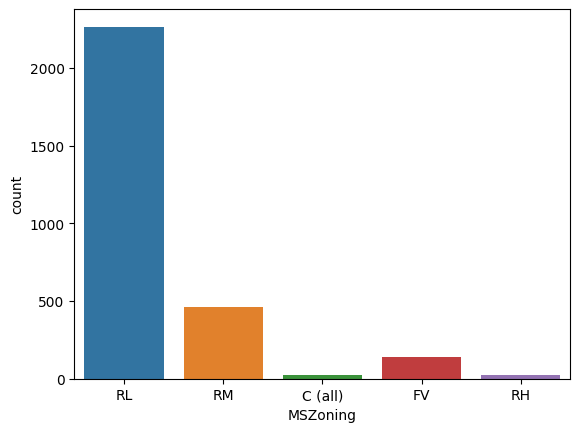

In [30]:
sns.countplot(x = df["MSZoning"])

In [31]:
mszoning_mode = df["MSZoning"].mode()[0]
mszoning_mode

'RL'

In [32]:
 df["MSZoning"].replace(np.nan, mszoning_mode, inplace=True)

In [33]:
### Backup of original data - I took mszoning altered by mistake
df_mvi = df.copy()
df_mvi.shape

(2918, 80)

In [34]:
df_mvi["MSZoning"].isnull().sum()

0

<Axes: xlabel='MSZoning', ylabel='count'>

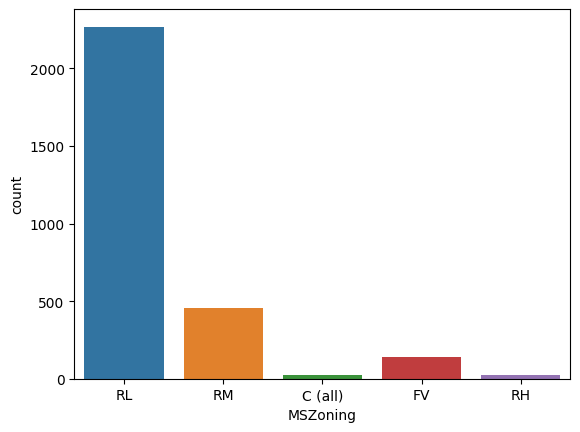

In [35]:
def old_new_CountPlot(df, df_new):
    plt.subplot(121)
    sns.countplot(x = df["MSZoning"])
    plt.subplot(122)
    sns.countplot(x = df_mvi["MSZoning"])
sns.countplot(x = df_mvi["MSZoning"])

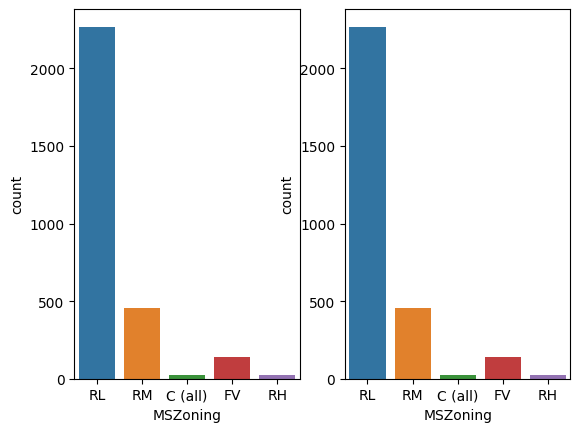

In [36]:
old_new_CountPlot(df, df_mvi)

### Handling Alley =93.216855

<Axes: xlabel='Alley', ylabel='count'>

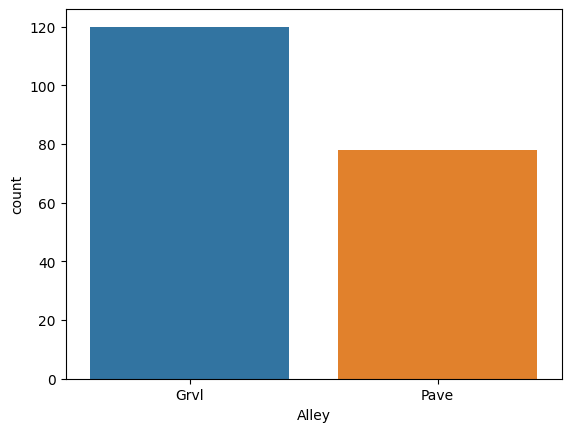

In [37]:
sns.countplot(x = df_mvi["Alley"])

<Axes: xlabel='Alley', ylabel='count'>

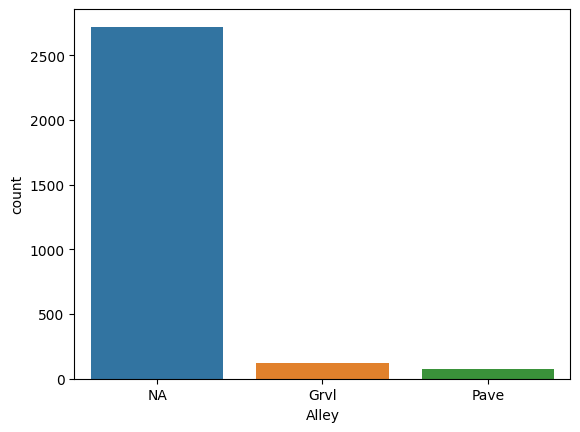

In [38]:
Alley_cont = "NA"
df_mvi["Alley"].replace(np.nan, Alley_cont, inplace = True)
sns.countplot(x = df_mvi["Alley"])

In [39]:
df_mvi["Alley"].isnull().sum()

0

### Handling LotFrontage = 16.649538

<Axes: xlabel='LotFrontage', ylabel='count'>

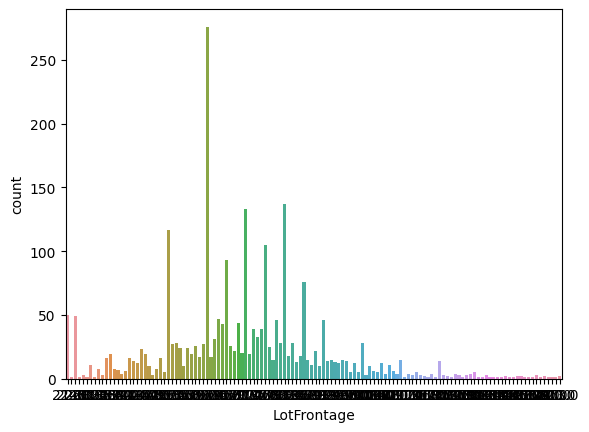

In [40]:
sns.countplot(x = df_mvi["LotFrontage"])

In [41]:
def boxHistPlot(df):
    plt.figure(figsize = (16,5))
    plt.subplot(121)
    sns.boxplot(x = df)
    plt.subplot(122)
    sns.distplot(x = df)

C:\Users\91769\AppData\Local\Temp\ipykernel_25508\602395626.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df)


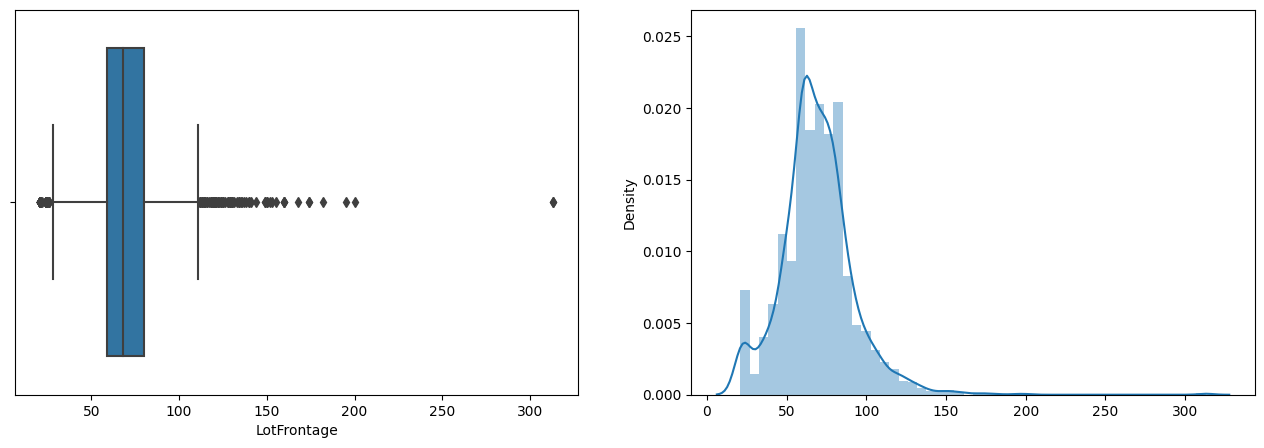

In [42]:
boxHistPlot(df["LotFrontage"])

In [43]:
lotfrontage_mean = df["LotFrontage"].mean()
lotfrontage_mean

69.2935855263158

In [44]:
df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace = True)

In [45]:
def oldnewPlot(df, df_mvi, feature):
    plt.subplot(221)
    sns.boxplot(x = df[feature])
    plt.title("old")
    plt.subplot(222)
    sns.distplot(x = df[feature])
    plt.title("old")
    plt.subplot(223)
    sns.boxplot(x = df_mvi[feature])
    plt.title("new")
    plt.subplot(224)
    sns.distplot(x = df_mvi[feature])
    plt.title("new")

    

C:\Users\91769\AppData\Local\Temp\ipykernel_25508\797710133.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df[feature])
C:\Users\91769\AppData\Local\Temp\ipykernel_25508\797710133.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_mvi[feature])


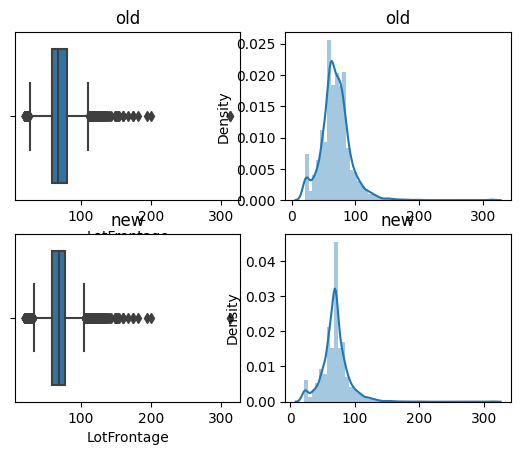

In [46]:
oldnewPlot(df,df_mvi, "LotFrontage")

### Utilities=0.068517

In [47]:
df["Utilities"].value_counts()

Utilities
AllPub    2915
NoSeWa       1
Name: count, dtype: int64

In [48]:
utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace=True)

### Exterior1st      0.034258
### Exterior2nd      0.034258

In [49]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     449
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [50]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        2
Other         1
Name: count, dtype: int64

In [51]:
Exterior1st_mode = df["Exterior1st"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, Exterior1st_mode, inplace=True)
df_mvi["Exterior1st"].isnull().sum()


0

In [52]:
Exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior2nd"].replace(np.nan, Exterior2nd_mode, inplace=True)
df_mvi["Exterior2nd"].isnull().sum()

0

### Handling MasVnrType      60.500171

<Axes: xlabel='MasVnrArea', ylabel='count'>

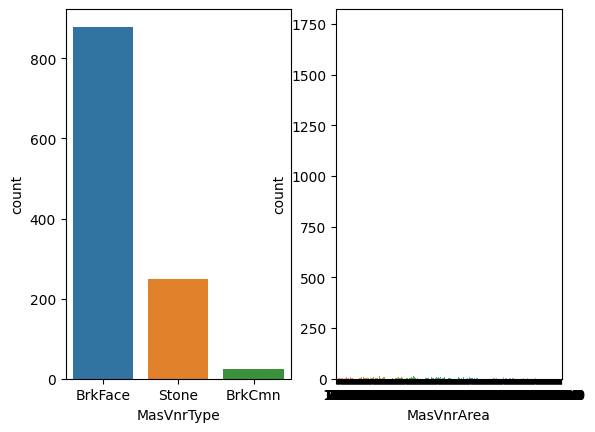

In [53]:
plt.subplot(121)
sns.countplot(x = df_mvi["MasVnrType"])
plt.subplot(122)
sns.countplot(x = df_mvi["MasVnrArea"])

<Axes: ylabel='Id'>

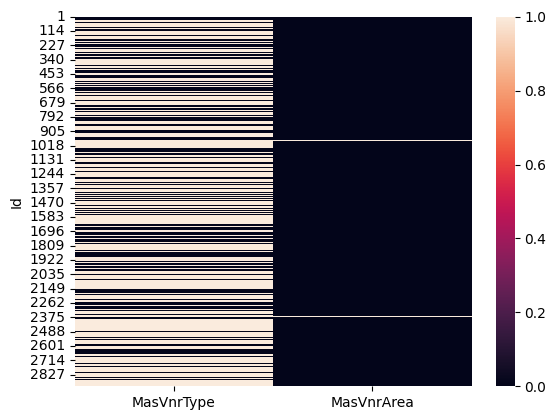

In [54]:

sns.heatmap(df_mvi[["MasVnrType", "MasVnrArea"]].isnull())


In [55]:
df_mvi["MasVnrArea"].isnull().sum()

23

In [56]:
df_mvi["MasVnrType"].replace(np.nan, "None", inplace=True)

In [57]:
df_mvi["MasVnrType"].isnull().sum()

0

In [58]:
df_mvi["MasVnrType"]

Id
1       BrkFace
2          None
3       BrkFace
4          None
5       BrkFace
         ...   
2915       None
2916       None
2917       None
2918       None
2919    BrkFace
Name: MasVnrType, Length: 2918, dtype: object

In [59]:
df_mvi["MasVnrArea"].replace(np.nan, "0", inplace=True)

In [60]:
df_mvi["MasVnrArea"].isnull().sum()

0

### Handling

<Axes: ylabel='Id'>

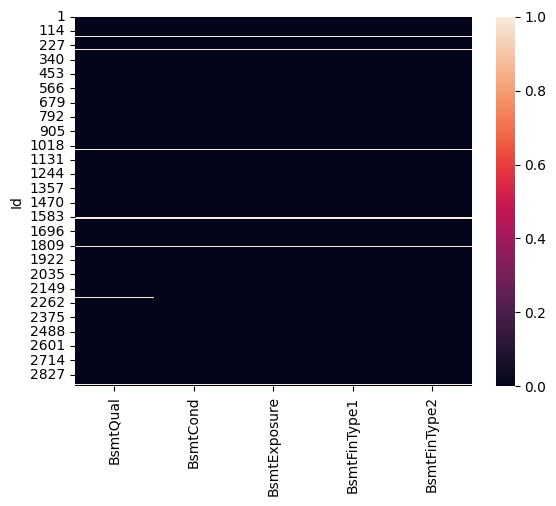

In [61]:
sns.heatmap(df_mvi[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]].isnull())


In [62]:
df_mvi["BsmtQual"].replace(np.nan, "NA", inplace=True)

In [63]:
df_mvi["BsmtCond"].replace(np.nan, "NA", inplace=True)
df_mvi["BsmtExposure"].replace(np.nan, "NA", inplace=True)
df_mvi["BsmtFinType1"].replace(np.nan, "NA", inplace=True)
df_mvi["BsmtFinType2"].replace(np.nan, "NA", inplace=True)

df_mvi[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [64]:
df_mvi["BsmtFinSF1"].isnull().sum()

0

<Axes: ylabel='Id'>

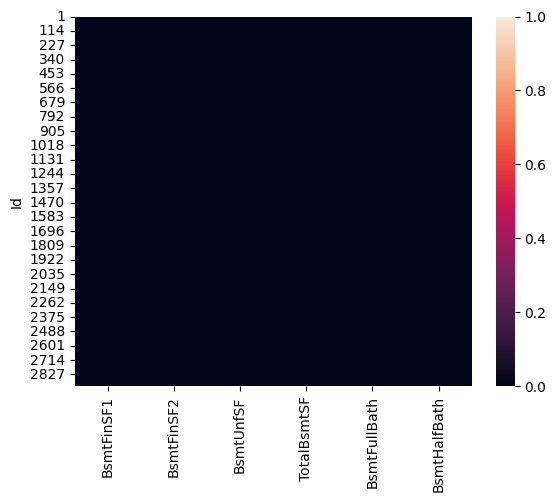

In [65]:
sns.heatmap(df_mvi[["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath", "BsmtHalfBath"]].isnull())

In [66]:
df_mvi["BsmtFullBath"].isnull().sum()

1

In [67]:
df_mvi["BsmtFinSF1"].mean()

441.4232350925291

In [68]:
df_mvi["BsmtFullBath"].mean()

0.429893726431265

In [69]:
df_mvi["BsmtUnfSF"].mean()

560.7721041809458

In [70]:
df_mvi["BsmtFinType2"].replace(np.nan, df_mvi["BsmtFinSF2"].mean(), inplace=True)

In [71]:
df_mvi["BsmtFinType1"].replace(np.nan, df_mvi["BsmtFinSF1"].mean(), inplace=True)

In [72]:
df_mvi["BsmtUnfSF"].replace(np.nan, df_mvi["BsmtUnfSF"].mean(), inplace=True)

In [73]:
df_mvi["TotalBsmtSF"].replace(np.nan, df_mvi["TotalBsmtSF"].mean(), inplace=True)
df_mvi["BsmtFullBath"].replace(np.nan, df_mvi["BsmtFullBath"].mean(), inplace=True)
df_mvi["BsmtHalfBath"].replace(np.nan, df_mvi["BsmtHalfBath"].mean(), inplace=True)

### Handling

In [74]:
garage_feat = ["GarageType","GarageFinish","GarageQual","GarageCond","GarageYrBlt","GarageCars","GarageArea"]

In [75]:
df["KitchenAbvGr"].isnull().sum()

0

In [76]:
Electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, Electrical_mode, inplace=True)
df_mvi["Electrical"].isnull().sum()

0

In [77]:
KitchenQual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan, KitchenQual_mode, inplace=True)
df_mvi["KitchenQual"].isnull().sum()

0

In [78]:
Functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan, Functional_mode, inplace=True)
df_mvi["Functional"].isnull().sum()

0

In [79]:
FireplaceQu_cont = "NA"
df_mvi["FireplaceQu"].replace(np.nan, FireplaceQu_cont,inplace = True)
df_mvi["FireplaceQu"].isnull().sum()

0

In [80]:
PoolQC_cont = "NA"
df_mvi["PoolQC"].replace(np.nan, PoolQC_cont,inplace = True)
df_mvi["PoolQC"].isnull().sum()

0

In [81]:
Fence_cont = "NA"
df_mvi["Fence"].replace(np.nan, Fence_cont,inplace = True)
df_mvi["Fence"].isnull().sum()

0

In [82]:
MiscFeature_cont = "NA"
df_mvi["MiscFeature"].replace(np.nan, MiscFeature_cont,inplace = True)
df_mvi["MiscFeature"].isnull().sum()

0

In [83]:
df_mvi["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      25
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [84]:
SaleType_mode = df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan, SaleType_mode, inplace=True)
df_mvi["SaleType"].isnull().sum()

0

<Axes: ylabel='Id'>

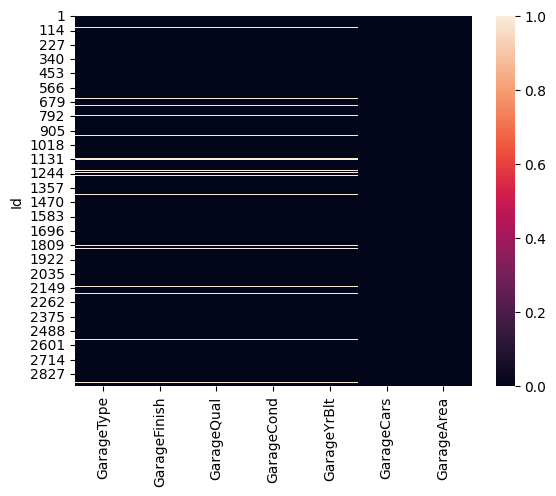

In [85]:
sns.heatmap(df[["GarageType","GarageFinish","GarageQual","GarageCond","GarageYrBlt","GarageCars","GarageArea"]].isnull())

In [86]:
GarageType_cont = "NA"
df_mvi["GarageType"].replace(np.nan, GarageType_cont,inplace = True)
df_mvi["GarageType"].isnull().sum()

0

In [87]:
GarageFinish_cont = "NA"
df_mvi["GarageFinish"].replace(np.nan, GarageFinish_cont,inplace = True)
df_mvi["GarageFinish"].isnull().sum()

0

In [88]:
GarageQual_cont = "NA"
df_mvi["GarageQual"].replace(np.nan, GarageQual_cont,inplace = True)
df_mvi["GarageQual"].isnull().sum()

0

In [89]:
GarageCond_cont = "NA"
df_mvi["GarageCond"].replace(np.nan, GarageCond_cont,inplace = True)
df_mvi["GarageCond"].isnull().sum()

0

<Axes: xlabel='GarageYrBlt', ylabel='count'>

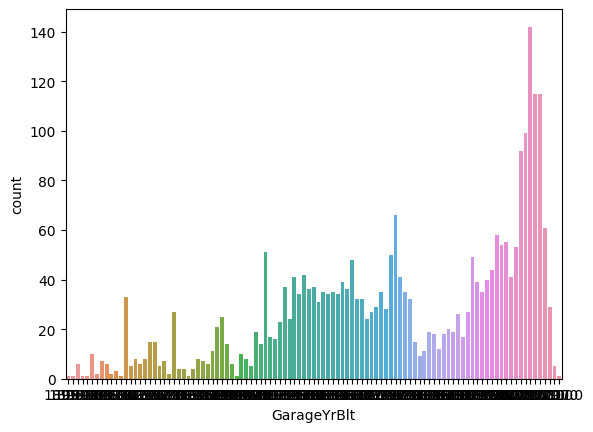

In [90]:
sns.countplot(x = df["GarageYrBlt"])

In [91]:
GarageYrBlt_cont = "0"
df_mvi["GarageYrBlt"].replace(np.nan, GarageYrBlt_cont,inplace = True)
df_mvi["GarageYrBlt"].isnull().sum()

0

In [92]:
GarageCars_cont = "0"
df_mvi["GarageCars"].replace(np.nan, GarageCars_cont,inplace = True)
df_mvi["GarageCars"].isnull().sum()

0

In [93]:
GarageArea_cont = "0"
df_mvi["GarageArea"].replace(np.nan, GarageArea_cont,inplace = True)
df_mvi["GarageArea"].isnull().sum()

0

<Axes: xlabel='GarageYrBlt', ylabel='count'>

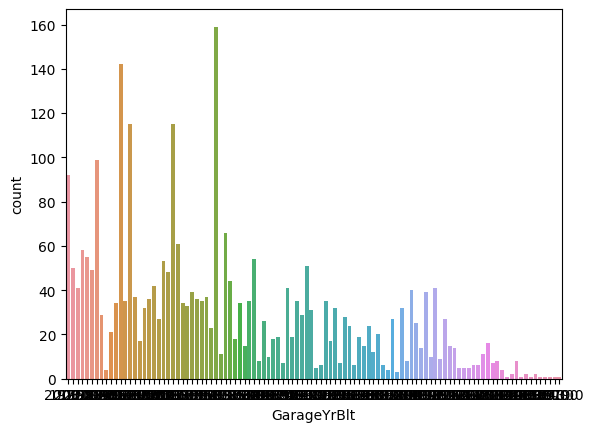

In [94]:
sns.countplot(x = df_mvi["GarageYrBlt"])

In [95]:
features = df.columns.tolist()
for feat in features:
    print(feat , " : ", df_mvi[feat].isnull().sum())

MSSubClass  :  0
MSZoning  :  0
LotFrontage  :  0
LotArea  :  0
Street  :  0
Alley  :  0
LotShape  :  0
LandContour  :  0
Utilities  :  0
LotConfig  :  0
LandSlope  :  0
Neighborhood  :  0
Condition1  :  0
Condition2  :  0
BldgType  :  0
HouseStyle  :  0
OverallQual  :  0
OverallCond  :  0
YearBuilt  :  0
YearRemodAdd  :  0
RoofStyle  :  0
RoofMatl  :  0
Exterior1st  :  0
Exterior2nd  :  0
MasVnrType  :  0
MasVnrArea  :  0
ExterQual  :  0
ExterCond  :  0
Foundation  :  0
BsmtQual  :  0
BsmtCond  :  0
BsmtExposure  :  0
BsmtFinType1  :  0
BsmtFinSF1  :  0
BsmtFinType2  :  0
BsmtFinSF2  :  0
BsmtUnfSF  :  0
TotalBsmtSF  :  0
Heating  :  0
HeatingQC  :  0
CentralAir  :  0
Electrical  :  0
1stFlrSF  :  0
2ndFlrSF  :  0
LowQualFinSF  :  0
GrLivArea  :  0
BsmtFullBath  :  0
BsmtHalfBath  :  0
FullBath  :  0
HalfBath  :  0
BedroomAbvGr  :  0
KitchenAbvGr  :  0
KitchenQual  :  0
TotRmsAbvGrd  :  0
Functional  :  0
Fireplaces  :  0
FireplaceQu  :  0
GarageType  :  0
GarageYrBlt  :  0
GarageFini

## Hence we have no missing values now !!

## Feature Transformation

### Convert Numerical -> Categorical

In [96]:
feat_num_conv = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
for feat in feat_num_conv:
    print(df_mvi[feat].dtype)

int64
int64
int64
object
int64
int64


In [97]:
df_mvi["GarageYrBlt"].head()

Id
1    2003.0
2    1976.0
3    2001.0
4    1998.0
5    2000.0
Name: GarageYrBlt, dtype: object

In [98]:
df_mvi[feat_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [99]:
df_mvi["MoSold"].value_counts()

MoSold
6     503
7     446
5     394
4     278
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: count, dtype: int64

In [100]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [101]:
import calendar

In [102]:
calendar.month_abbr[1]

'Jan'

In [103]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])

In [104]:
df_mvi[feat_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,Feb,2008
2,20,1976,1976,1976.0,May,2007
3,60,2001,2002,2001.0,Sep,2008
4,70,1915,1970,1998.0,Feb,2006
5,60,2000,2000,2000.0,Dec,2008


In [105]:
for feat in feat_num_conv:
    df_mvi[feat] = df_mvi[feat].astype(str)

In [106]:
for feat in feat_num_conv:
    print(df_mvi[feat].dtype)

object
object
object
object
object
object


## Convert Categorical -> Numerical

### Ordinal Encoding

In [107]:
ordinal_end_var = ["ExterQual", "ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond","PoolQC","Functional","GarageFinish","PavedDrive","Utilities"]
print("Total number of features to be converted by ordinal ending format :", len(ordinal_end_var))

Total number of features to be converted by ordinal ending format : 18


In [108]:
from pandas.api.types import CategoricalDtype

In [109]:
df_mvi["ExterQual"].astype(CategoricalDtype(categories = ["Po", "FA", "TA", "Gd", "Ex"],ordered = True)).cat.codes

Id
1       3
2       2
3       3
4       2
5       3
       ..
2915    2
2916    2
2917    2
2918    2
2919    2
Length: 2918, dtype: int8

In [110]:
df_mvi["ExterQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [111]:
df_mvi["ExterQual"] = df_mvi["ExterQual"].astype(CategoricalDtype(categories = ["Po", "FA", "TA", "Gd", "Ex"],ordered = True)).cat.codes

In [112]:
df_mvi["ExterQual"]

Id
1       3
2       2
3       3
4       2
5       3
       ..
2915    2
2916    2
2917    2
2918    2
2919    2
Name: ExterQual, Length: 2918, dtype: int8

In [113]:
df_mvi["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av', 'NA'], dtype=object)

In [114]:
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories = ["NA", "No", "Mn", "Av", "Gd"],ordered = True)).cat.codes

In [115]:
df_mvi["BsmtExposure"]

Id
1       1
2       4
3       2
4       1
5       3
       ..
2915    1
2916    1
2917    1
2918    3
2919    3
Name: BsmtExposure, Length: 2918, dtype: int8

In [116]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
1    1904
3     418
4     276
2     239
0      81
Name: count, dtype: int64

In [117]:
df_mvi["ExterCond"] = df_mvi["ExterCond"].astype(CategoricalDtype(categories = ["Po", "Fa", "TA", "Gd", "Ex"],ordered = True)).cat.codes
df_mvi["BsmtQual"] = df_mvi["BsmtQual"].astype(CategoricalDtype(categories = ["NA", "Po", "Fa", "TA", "Gd", "Ex"],ordered = True)).cat.codes
df_mvi["BsmtCond"] = df_mvi["BsmtCond"].astype(CategoricalDtype(categories = ["NA", "Po", "Fa", "TA", "Gd", "Ex"],ordered = True)).cat.codes
df_mvi["BsmtFinType1"] = df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories = ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],ordered = True)).cat.codes
df_mvi["BsmtFinType2"] = df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories = ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],ordered = True)).cat.codes
df_mvi["HeatingQC"] = df_mvi["HeatingQC"].astype(CategoricalDtype(categories = ["Po", "Fa", "TA", "Gd", "Ex"],ordered = True)).cat.codes
df_mvi["KitchenQual"] = df_mvi["KitchenQual"].astype(CategoricalDtype(categories = ["Po", "Fa", "TA", "Gd", "Ex"],ordered = True)).cat.codes
df_mvi["FireplaceQu"] = df_mvi["FireplaceQu"].astype(CategoricalDtype(categories = ["TA", "Gd", "Ex"],ordered = True)).cat.codes
df_mvi["GarageQual"] = df_mvi["GarageQual"].astype(CategoricalDtype(categories = ["NA", "Po", "Fa", "TA", "Gd", "Ex"],ordered = True)).cat.codes
df_mvi["GarageCond"] = df_mvi["GarageCond"].astype(CategoricalDtype(categories = ["NA", "Po", "Fa", "TA", "Gd", "Ex"],ordered = True)).cat.codes
df_mvi["PoolQC"] = df_mvi["PoolQC"].astype(CategoricalDtype(categories = ["NA", "Fa", "TA", "Gd", "Ex"],ordered = True)).cat.codes
df_mvi["Functional"] = df_mvi["Functional"].astype(CategoricalDtype(categories = ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2","Min1","Typ"],ordered = True)).cat.codes
df_mvi["GarageFinish"] = df_mvi["GarageFinish"].astype(CategoricalDtype(categories = ["NA", "Unf", "RFn", "Fin"],ordered = True)).cat.codes
df_mvi["PavedDrive"] = df_mvi["PavedDrive"].astype(CategoricalDtype(categories = ["N", "P", "Y"],ordered = True)).cat.codes
df_mvi["Utilities"] = df_mvi["Utilities"].astype(CategoricalDtype(categories = ["ELO", "NoSeWa", "NoSewr", "AllPub"],ordered = True)).cat.codes


In [118]:
df_mvi["BsmtFinSF1"]

Id
1        706
2        978
3        486
4        216
5        655
        ... 
2915       0
2916     252
2917    1224
2918     337
2919     758
Name: BsmtFinSF1, Length: 2918, dtype: int64

In [119]:
df_mvi["Utilities"].value_counts()

Utilities
3    2917
1       1
Name: count, dtype: int64

In [120]:
df_mvi["Utilities"].value_counts()

Utilities
3    2917
1       1
Name: count, dtype: int64

In [121]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2918 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2918 non-null   object 
 1   MSZoning       2918 non-null   object 
 2   LotFrontage    2918 non-null   float64
 3   LotArea        2918 non-null   int64  
 4   Street         2918 non-null   object 
 5   Alley          2918 non-null   object 
 6   LotShape       2918 non-null   object 
 7   LandContour    2918 non-null   object 
 8   Utilities      2918 non-null   int8   
 9   LotConfig      2918 non-null   object 
 10  LandSlope      2918 non-null   object 
 11  Neighborhood   2918 non-null   object 
 12  Condition1     2918 non-null   object 
 13  Condition2     2918 non-null   object 
 14  BldgType       2918 non-null   object 
 15  HouseStyle     2918 non-null   object 
 16  OverallQual    2918 non-null   int64  
 17  OverallCond    2918 non-null   int64  
 18  YearBuilt    

### Nominal Encoding | One Hot Encoding

In [138]:
df_encod = df_mvi.copy()

object_feat = df_encod.select_dtypes(include="object").columns.tolist()
print("Total Object data type features : ", len(object_feat))
print("Features: \n ", object_feat)

Total Object data type features :  35
Features: 
  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [139]:
df_encod[object_feat].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,Heating,CentralAir,Electrical,GarageType,GarageYrBlt,GarageCars,GarageArea,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,GasA,Y,SBrkr,Attchd,2003.0,2.0,548.0,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,GasA,Y,SBrkr,Attchd,1976.0,2.0,460.0,NA,NA,May,2007,WD,Normal
3,60,RL,Pave,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,GasA,Y,SBrkr,Attchd,2001.0,2.0,608.0,NA,NA,Sep,2008,WD,Normal
4,70,RL,Pave,NA,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,GasA,Y,SBrkr,Detchd,1998.0,3.0,642.0,NA,NA,Feb,2006,WD,Abnorml
5,60,RL,Pave,NA,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,GasA,Y,SBrkr,Attchd,2000.0,3.0,836.0,NA,NA,Dec,2008,WD,Normal


In [140]:
df_encod = pd.get_dummies(df_encod, columns = object_feat, prefix = object_feat, drop_first = True)

In [141]:
df_encod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2918 entries, 1 to 2919
Columns: 1563 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(1518), float64(4), int64(24), int8(17)
memory usage: 4.9 MB


# Now our Data is  ready ! now we can give this data to our ml model !

## split the data into training and testing set

In [142]:
df_encod.shape

(2918, 1563)

In [143]:
X_train = df_encod[:1459].drop("SalePrice", axis = 1)
y_train = df_encod["SalePrice"][:1459]
X_test = df_encod[1459:].drop("SalePrice", axis=1)

print("Shape of X_train: ", X_train.shape)

print("Shape of X_test: ", X_test.shape)

print("Shape of y_train: ", y_train.shape)

Shape of X_train:  (1459, 1562)
Shape of X_test:  (1459, 1562)
Shape of y_train:  (1459,)


## Feature Scaling

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
sc = StandardScaler()
sc.fit(X_train)

# formula : z = (x-u)/s

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [146]:
X_train[:3, :]

array([[-0.22302747, -0.20711081,  0.02618914, ..., -0.11789207,
         0.4678467 , -0.3061097 ],
       [ 0.45800082, -0.09189482,  0.02618914, ..., -0.11789207,
         0.4678467 , -0.3061097 ],
       [-0.08682181,  0.07341508,  0.02618914, ..., -0.11789207,
         0.4678467 , -0.3061097 ]])

## Train ML Model

In [147]:
!pip install xgboost


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor


In [149]:
lr = LinearRegression()
svr = SVR()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()
mlpr = MLPRegressor()


In [150]:
models = {"a":["LinearRegression", lr],
          "b": ["SVR", svr],
          "c": ["SGDRegressor", sgdr], 
          "d":["KNeighborsRegressor", knr], 
          "e":["GaussianProcessRegressor", gpr], 
          "f":["DecisionTreeRegressor", dtr], 
          "g":["GradientBoostingRegressor", gbr], 
          "h":["RandomForestRegressor", rfr], 
          "i":["XGBRegressor", xgbr], 
          "j":["MLPRegressor", mlpr], 
          }

### Cross Validation

In [151]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 7, shuffle = True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [152]:
models_score = []
for model in models:
    print("Training Model : ",models[model][0])
    score = test_model(models[model][1], X_train, y_train)
    print("SCORE : ", score)
    models_score.append([models[model][0], score[0]])

Training Model :  LinearRegression
SCORE :  [-1.1365481199271421e+27]
Training Model :  SVR
SCORE :  [-0.051585142908194506]
Training Model :  SGDRegressor
SCORE :  [-3681330.2259557736]
Training Model :  KNeighborsRegressor
SCORE :  [0.1936615882655188]
Training Model :  GaussianProcessRegressor
SCORE :  [-5.334713538227559]
Training Model :  DecisionTreeRegressor
SCORE :  [0.6690906925913909]
Training Model :  GradientBoostingRegressor
SCORE :  [0.825059695591014]
Training Model :  RandomForestRegressor
SCORE :  [0.8212428774262536]
Training Model :  XGBRegressor
SCORE :  [0.8021249750213111]
Training Model :  MLPRegressor


C:\Users\91769\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91769\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91769\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91769\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

SCORE :  [-4.976491086400578]


C:\Users\91769\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [153]:
print(models_score)

[['LinearRegression', -1.1365481199271421e+27], ['SVR', -0.051585142908194506], ['SGDRegressor', -3681330.2259557736], ['KNeighborsRegressor', 0.1936615882655188], ['GaussianProcessRegressor', -5.334713538227559], ['DecisionTreeRegressor', 0.6690906925913909], ['GradientBoostingRegressor', 0.825059695591014], ['RandomForestRegressor', 0.8212428774262536], ['XGBRegressor', 0.8021249750213111], ['MLPRegressor', -4.976491086400578]]


In [154]:
models2 = {"a": ["GradientBoostingRegressor", gbr],"b": ["RandomForestRegressor", rfr],"c": ["XGBRegressor", xgbr]}

In [155]:

def test_model2(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 8, shuffle = True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score
models_score_2 = []
for model in models2:
    print("Training Model : ",models2[model][0])
    score = test_model2(models2[model][1], X_train, y_train)
    print("SCORE : ", score)
    models_score_2.append([models2[model][0], score[0]])

Training Model :  GradientBoostingRegressor
SCORE :  [0.8790302540329697]
Training Model :  RandomForestRegressor
SCORE :  [0.8573734894284245]
Training Model :  XGBRegressor
SCORE :  [0.850546079479123]


In [156]:
print(models_score_2)

[['GradientBoostingRegressor', 0.8790302540329697], ['RandomForestRegressor', 0.8573734894284245], ['XGBRegressor', 0.850546079479123]]


In [157]:
def test_model3(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 10, shuffle = True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score
models_score_3 = []
for model in models2:
    print("Training Model : ",models2[model][0])
    score = test_model3(models2[model][1], X_train, y_train)
    print("SCORE : ", score)
    models_score_3.append([models2[model][0], score[0]])

Training Model :  GradientBoostingRegressor
SCORE :  [0.8755289640425176]
Training Model :  RandomForestRegressor
SCORE :  [0.8523917939441917]
Training Model :  XGBRegressor
SCORE :  [0.8393848749538811]


In [158]:
x = GradientBoostingRegressor()
final_model = {"a" : ["GradientBoostingRegressor", x]}
def test_model2(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 8, shuffle = True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score
score = []
for model in final_model:
    print("Training Model : ",final_model[model][0])
    score = test_model2(final_model[model][1], X_train, y_train)
    print("SCORE : ", score)
    models_score.append([final_model[model][0], score[0]])

Training Model :  GradientBoostingRegressor
SCORE :  [0.8845044479500821]


In [159]:
x.fit(X_train, y_train)

GradientBoostingRegressor()

In [160]:
X_test

array([[ 0.23099139, -0.05813153,  0.02618914, ..., -0.11789207,
         0.4678467 , -0.3061097 ],
       [ 0.45800082,  0.11068495,  0.02618914, ..., -0.11789207,
         0.4678467 , -0.3061097 ],
       [ 0.50340271,  0.37568173,  0.02618914, ..., -0.11789207,
         0.4678467 , -0.3061097 ],
       ...,
       [ 4.0901517 ,  0.95005849,  0.02618914, ..., -0.11789207,
        -2.13745229, -0.3061097 ],
       [-0.35923312, -0.00763687,  0.02618914, ..., -0.11789207,
         0.4678467 , -0.3061097 ],
       [ 0.18558951, -0.08918975,  0.02618914, ..., -0.11789207,
         0.4678467 , -0.3061097 ]])

In [161]:
print("Making predictions")
print(X_test)
print()
print("Predicted Prices")
predicted_house_prices = pd.Series(x.predict(X_test))
print(predicted_house_prices)


Making predictions
[[ 0.23099139 -0.05813153  0.02618914 ... -0.11789207  0.4678467
  -0.3061097 ]
 [ 0.45800082  0.11068495  0.02618914 ... -0.11789207  0.4678467
  -0.3061097 ]
 [ 0.50340271  0.37568173  0.02618914 ... -0.11789207  0.4678467
  -0.3061097 ]
 ...
 [ 4.0901517   0.95005849  0.02618914 ... -0.11789207 -2.13745229
  -0.3061097 ]
 [-0.35923312 -0.00763687  0.02618914 ... -0.11789207  0.4678467
  -0.3061097 ]
 [ 0.18558951 -0.08918975  0.02618914 ... -0.11789207  0.4678467
  -0.3061097 ]]

Predicted Prices
0       153752.394686
1       121464.479476
2       159144.378412
3       168472.254108
4       181405.354115
            ...      
1454     81394.171333
1455     84043.602079
1456    162401.060664
1457    123167.025361
1458    215116.625561
Length: 1459, dtype: float64


In [162]:
pd.set_option('display.max_rows', None)
print(predicted_house_prices)

0       153752.394686
1       121464.479476
2       159144.378412
3       168472.254108
4       181405.354115
5       200628.688361
6       169789.850011
7       157215.309790
8       159439.013171
9       188322.745691
10      128642.359696
11      201711.230704
12       96531.178256
13       93626.574392
14      152647.523067
15      144848.586596
16      422615.370759
17      251477.465791
18      309225.924406
19      283546.118508
20      462315.843566
21      321641.459789
22      217030.266418
23      166306.479789
24      176533.832344
25      174807.695273
26      196596.069330
27      347035.931915
28      240065.370327
29      200473.103149
30      225395.833870
31      192384.175512
32       95572.121342
33      179926.285938
34      291202.905062
35      306349.931840
36      231892.773494
37      181155.081770
38      167727.092649
39      168122.955552
40      149388.778220
41      166695.855318
42      163428.021913
43      281727.444764
44      231580.260110
45      21

# Hence Predicted the prices !! 

### ... Thank You